# Million Songs:
Link to dataset:- https://labrosa.ee.columbia.edu/millionsong/



### Task: Artist prediction

In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
dataset = pd.read_csv("millionSongs.csv") ### Contains only 10,000 instances. Original -> 1 Million!

In [29]:
dataset.head()

,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,...,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,...,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,...,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,...,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,...,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


In [30]:
dataset.shape

(10000, 35)

In [31]:
#General statistics...
print(dataset.describe())

       artist.hotttnesss  artist_mbtags_count  bars_confidence    bars_start  \
count       10000.000000         10000.000000     10000.000000  10000.000000   
mean            0.385552             0.524686         0.239595      1.065246   
std             0.143647             0.884095         0.288259      1.723468   
min             0.000000             0.000000         0.000000      0.000000   
25%             0.325266             0.000000         0.035000      0.441590   
50%             0.380742             0.000000         0.120000      0.785460   
75%             0.453858             1.000000         0.351000      1.224075   
max             1.082503             9.000000         8.855240     59.743540   

       beats_confidence   beats_start      duration  end_of_fade_in  \
count      10000.000000  10000.000000  10000.000000    10000.000000   
mean           0.613963      0.428497    240.622038        0.756708   
std            0.322441      0.806217    246.084090        1.85895

## Pre data processing for PCA:

In [32]:
float_dataset = dataset.select_dtypes(include=['float']) # has only float values as the PCA function can on;y take float values.
float_dataset.head()

,artist.hotttnesss,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,...,loudness,mode_confidence,song.hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms_freq,time_signature,time_signature_confidence
0,0.401998,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,...,-11.197,0.636,0.602120,218.932,0.779,0.28519,92.198,1.000000,4.0,0.778
1,0.417500,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,...,-9.843,0.430,NaN,137.915,0.969,0.20627,121.274,1.000000,4.0,0.384
2,0.343428,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,...,-9.689,0.565,NaN,172.304,0.482,0.42132,100.070,1.000000,1.0,0.000
3,0.454231,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,...,-9.013,0.749,NaN,217.124,0.601,0.56254,119.293,0.988584,4.0,0.000
4,0.401724,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,...,-4.501,0.371,0.604501,198.699,1.000,0.13576,129.738,0.887288,4.0,0.562


In [33]:
float_dataset.mean()

artist.hotttnesss              0.385552
artist_mbtags_count            0.524686
bars_confidence                0.239595
bars_start                     1.065246
beats_confidence               0.613963
beats_start                    0.428497
duration                     240.622038
end_of_fade_in                 0.756708
familiarity                    0.565456
key                            5.366580
key_confidence                 0.451458
latitude                      37.157357
longitude                    -63.933358
loudness                     -10.483529
mode_confidence                0.477765
song.hotttnesss                0.342761
start_of_fade_out            229.883436
tatums_confidence              0.507875
tatums_start                   0.299886
tempo                        122.900913
terms_freq                   224.890313
time_signature                 3.564443
time_signature_confidence      0.599785
dtype: float64

In [34]:
# fill the missing values in each column
for c in float_dataset.columns:
    float_dataset[c].fillna(float_dataset[c].mean(), inplace=True)
float_dataset

/Users/shehjarsadhu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,artist.hotttnesss,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,...,loudness,mode_confidence,song.hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms_freq,time_signature,time_signature_confidence
0,0.401998,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,...,-11.197,0.636,0.602120,218.932,0.779,0.28519,92.198,1.000000,4.0,0.778
1,0.417500,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,...,-9.843,0.430,0.342761,137.915,0.969,0.20627,121.274,1.000000,4.0,0.384
2,0.343428,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,...,-9.689,0.565,0.342761,172.304,0.482,0.42132,100.070,1.000000,1.0,0.000
3,0.454231,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,...,-9.013,0.749,0.342761,217.124,0.601,0.56254,119.293,0.988584,4.0,0.000
4,0.401724,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,...,-4.501,0.371,0.604501,198.699,1.000,0.13576,129.738,0.887288,4.0,0.562
5,0.385471,0.0,0.121,1.17118,0.438,0.74856,267.70240,2.264,0.535293,5.0,...,-9.323,0.557,0.342761,254.270,0.136,0.53929,147.782,1.000000,3.0,0.454
6,0.261941,0.0,0.709,0.27253,0.709,0.27253,114.78159,0.096,0.556496,1.0,...,-17.302,0.000,0.342761,114.782,0.467,0.05611,111.787,1.000000,1.0,0.000
7,0.605507,0.0,0.142,0.65428,0.234,0.65428,189.57016,0.319,0.801136,4.0,...,-11.642,0.160,0.342761,181.023,0.292,0.36129,101.430,0.999818,3.0,0.408
8,0.332276,0.0,0.806,1.91886,0.440,1.22595,269.81832,5.300,0.426668,4.0,...,-13.496,0.652,0.265861,258.990,0.121,1.22595,86.643,0.959766,4.0,0.487
9,0.422706,0.0,0.047,0.62445,1.000,0.09933,266.39628,0.084,0.550514,7.0,...,-6.697,0.473,0.342761,261.747,1.000,0.09933,114.041,0.915602,4.0,0.878


## Principal Compenent Analysis for visualisation: 

In [35]:
# reduces dimentions of the sata from 35 columns to 2 columns.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(float_dataset)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [36]:
finalDf = pd.concat([principalDf, dataset[['artist.name']]], axis = 1)

In [37]:
finalDf.head()

,principal component 1,principal component 2,artist.name
0,-224.089718,-21.546539,Casual
1,-224.770930,-129.169323,The Box Tops
2,-224.486224,-83.807129,Sonora Santanera
3,-223.962152,-12.545373,Adam Ant
4,-224.292687,-42.441855,Gob


In [38]:
print(pca.components_)

[[-3.63039721e-08  3.72058209e-06  3.84778892e-06 -2.90365613e-08
  -2.74253181e-07 -2.69877804e-05  9.74049786e-03 -3.37499385e-07
  -1.05978799e-07  4.01695790e-04  8.32012837e-06  5.90590368e-10
   2.61323378e-09  4.68272742e-06 -1.07972547e-07 -1.53077676e-07
  -1.11977913e-04  3.89425595e-06 -1.33849705e-07 -5.44428460e-05
   9.99952391e-01 -1.40045424e-06  4.01184372e-04]
 [ 1.90922000e-05  2.30908115e-04 -8.50995383e-05  2.94298653e-04
  -1.48350917e-04  2.37385208e-04  7.13102375e-01  1.27684320e-03
   3.39060653e-05  3.51480688e-04  5.57448854e-05  1.77873215e-03
   8.32033074e-03  2.09671861e-03  9.82447622e-07  5.60977021e-06
   7.00966417e-01 -7.69789738e-05  2.25190389e-04 -2.06019042e-03
  -6.86816106e-03  8.82740279e-04  2.46413607e-04]]


In [39]:
print(pca.explained_variance_)

[5.01456589e+08 2.55068450e+04]


In [40]:
print("original shape:   ", dataset.shape)
print("transformed shape:", finalDf.shape)

original shape:    (10000, 35)
transformed shape: (10000, 3)


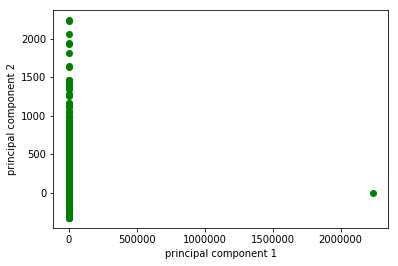

In [41]:
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], color='g')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [42]:
x = float_dataset.select_dtypes(include=['float'])
y = dataset[dataset.columns[2]]
y.head()

0              Casual
1        The Box Tops
2    Sonora Santanera
3            Adam Ant
4                 Gob
Name: artist.name, dtype: object

In [43]:
unique_artiats = y.unique()
print("Number of unique artists:",len(unique_artiats))

Number of unique artists: 4412


In [44]:
X_train , X_test, y_train, y_test = train_test_split(float_dataset, y, test_size = 0.2, random_state = 1)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 23)
(2000, 23)
(8000,)
(2000,)


In [46]:
scaler = StandardScaler()
scaler.fit(X_train) #fit train set only.

StandardScaler(copy=True, with_mean=True, with_std=True)

## PCA for faster predictions:

In [47]:
pca = PCA(.95) #such that pca has 95% variance is retained.
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
train = pca.transform(X_train)
test = pca.transform(X_test)

# KNN:

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
classifier = KNeighborsClassifier(n_neighbors=13,algorithm = "kd_tree",p = 2,metric="minkowski",weights="distance")
classifier.fit(train, y_train)
y_pred = classifier.predict(test)

In [51]:
print(y_pred)
print("Number of predictions: ",len(y_pred))

['Gloria De Haven' 'Busdriver' 'Stephan Micus' ... 'Pentangle'
 'MarAa Elena Walsh' 'Twista']
Number of predictions:  2000


## Classification report on first run:

In [52]:
# Summary of the predictions made by the classifier
print("classification_report:")
print(classification_report(y_test, y_pred))
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

classification_report:
                                                                                                                                                                                                                                                                 precision    recall  f1-score   support

                                                                                                                                                                                                                                                            !!!       0.00      0.00      0.00         1
                                                                                                                                                                                                                                                     (hed) p.e.       0.00      0.00      0.00         1
                                                                                     

accuracy is 0.0005


/Users/shehjarsadhu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shehjarsadhu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## 10 fold Cross Validation results:

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, float_dataset, y, cv=10)
print(scores)
print("Best accuracy achieved:",scores.max()*100,"%")

/Users/shehjarsadhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.01266109 0.02173913 0.03698332 0.0372093  0.03777336 0.03533569
 0.0625     0.05333333 0.04878049 0.13636364]
Best accuracy achieved: 13.636363636363635 %


# Support vector machines

In [ ]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

/Users/shehjarsadhu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
